In [25]:
#load_data is a function for loading data from a local directory i.e Downloads
import os
import pandas as pd
titanic_path= r"C:\Users\Lucid\Downloads"
def load_data(titan_path="gender_submission.csv"):
    csv_path = os.path.join(titanic_path, titan_path)
    return pd.read_csv(csv_path)

In [31]:
titanic_train = load_data("train.csv")#loadin the training data
print(titanic_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [32]:
print(titanic_train.Survived)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [39]:
titanic_train.isnull().sum()#gives you the attributes with missing values. We can't use Age, Cabin and Embarked unless all data is given

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [38]:
titanic_test= load_data("test.csv")
print(titanic_test.head()) #loading test data

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [46]:
#Use the tolist() function to convert series into list datatype
print("Titanic columns:", titanic_train.columns.tolist())
print("Titanic rows:", titanic_test.columns.tolist())

Titanic columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
Titanic rows: ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [48]:
#read a sample submission file
titanic_sample= load_data("gender_submission.csv")
print(titanic_sample.head())

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1


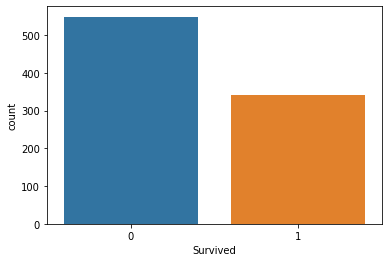

In [49]:
import matplotlib as plb
import seaborn as sb
sb.countplot(titanic_train.Survived)

In [52]:
#using logistic regression for classification model
#defining Sex as a dummy variable. A dummy variable is an indicator that represents categorical data
#for k classifications, k-1 dummy variables are defined else multicollinearity
from sklearn.linear_model import LogisticRegression
logistic_regression= LogisticRegression()
logistic_regression.fit(X= pd.get_dummies(titanic_train['Sex']), y= titanic_train['Survived'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
titanic_test['Survived']= logistic_regression.predict(pd.get_dummies(titanic_test['Sex']))

In [61]:
titanic_test[['PassengerId', 'Survived']].to_csv('kaggle_submission.csv',index= False)
titanic_submission= pd.read_csv('kaggle_submission.csv')


   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
